# Online Shoppers Purchasing Intention

Data source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

## Description
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

## Attributes
The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
#load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#view dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* There are 12330 rows and 17 columns. 
* Weekend and Revenue are represented as boolean. 
* None of the rows have missing values

In [5]:
#unique values in the different types of pages
df[["Administrative", "Informational", "ProductRelated"]].nunique()

Administrative     27
Informational      17
ProductRelated    311
dtype: int64

In [6]:
#values in administrative
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

## Visualize Relationships

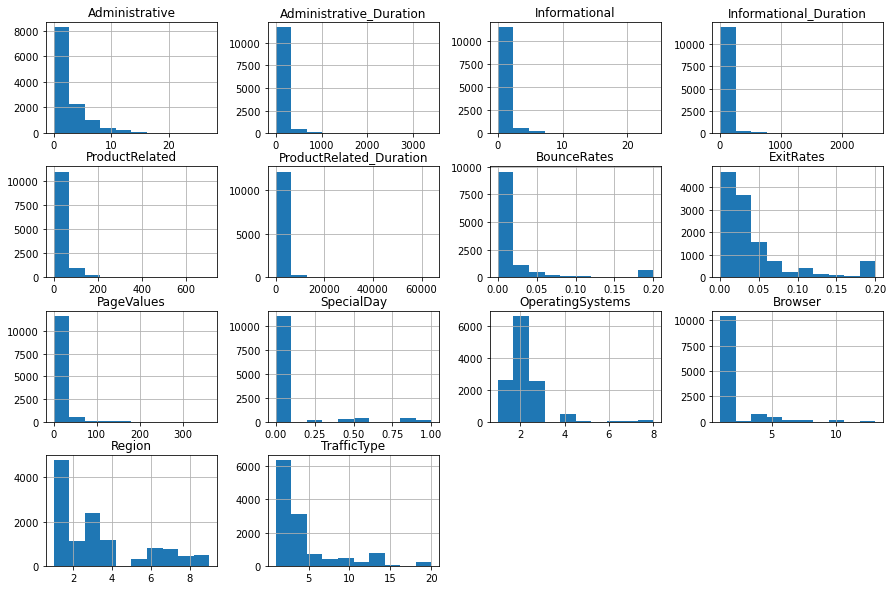

In [7]:
#plot all columns for univariate analysis
df.hist(figsize=(15,10))

plt.show()

* Most columns have right skewed distributions: most customer activity tends more towards zero

Text(0, 0.5, 'Number of visits')

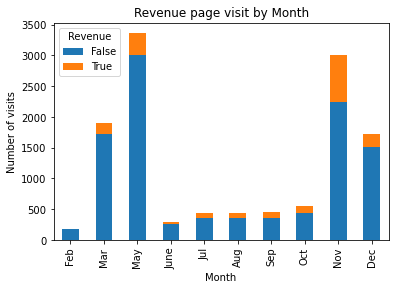

In [13]:
#plot monthly activity comparing revenues
available_months=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
#set order with available months
pd.crosstab(df.Month,df.Revenue).loc[available_months].plot(kind='bar',stacked=True)

plt.title('Revenue page visit by Month')
plt.ylabel('Number of visits')

November saw the most revenue page visits, followed by May.
Are there special offers in November and perhaps May that drive purchases? Campaigns during Thanksgiving?

Text(0, 0.5, 'Number of visits')

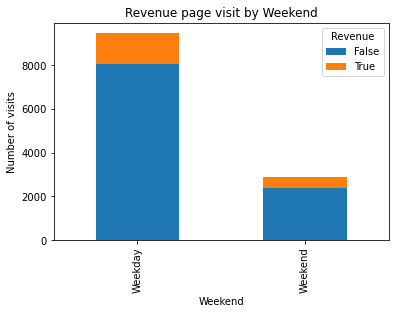

In [14]:
#plot weekend revenue distribution
pd.crosstab(df.Weekend.map({True:'Weekend',False:'Weekday'}),df.Revenue).plot(kind='bar',stacked=True)

plt.title('Revenue page visit by Weekend')
plt.ylabel('Number of visits')

Weekends yield fewer revenue page visits compared to weekdays.

### What Effect Does Traffic Type Have on Purchase Intent?

Text(0, 0.5, 'Number of visits')

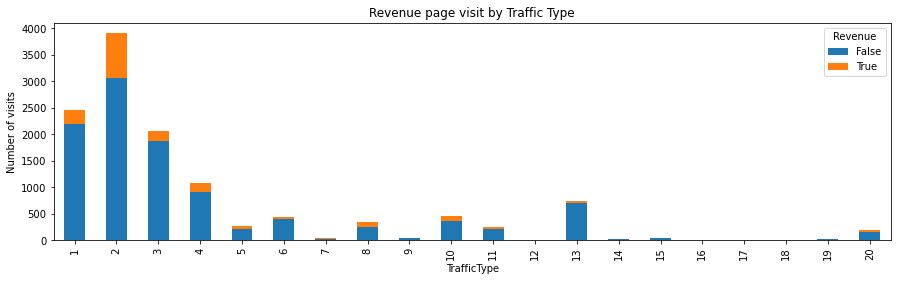

In [15]:

#plot traffic type revenue distribution
pd.crosstab(df.TrafficType,df.Revenue).plot(kind='bar',stacked=True,figsize=(15,4))

plt.title('Revenue page visit by Traffic Type')
plt.ylabel('Number of visits')

Traffic type 2 contains the most purchase activities

## What effect does visitor type have on purchase activities

Text(0, 0.5, 'Number of visits')

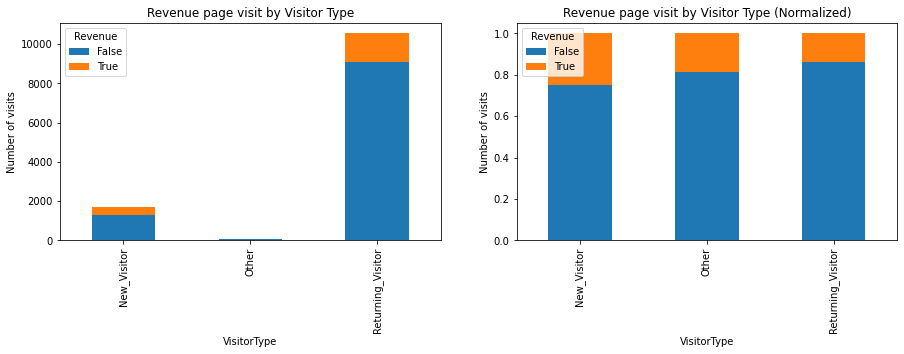

In [17]:

#plot visitor type revenue distribution

fig,ax = plt.subplots(1,2,figsize=(15,4))
pd.crosstab(df.VisitorType,df.Revenue).plot(kind='bar',stacked=True,ax=ax[0])
ax[0].set_title('Revenue page visit by Visitor Type')
ax[0].set_ylabel('Number of visits')

pd.crosstab(df.VisitorType,df.Revenue,normalize='index').plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_title('Revenue page visit by Visitor Type (Normalized)')
ax[1].set_ylabel('Number of visits')

Returning visitors are more likely to make a purchase decision than new visitors

Text(0.5, 1.0, 'Average Page Duration by Visitor Type')

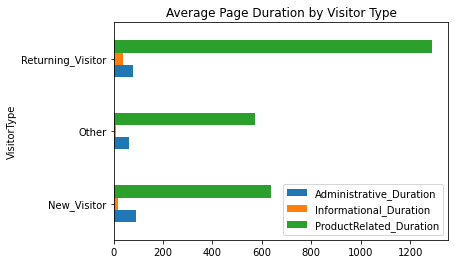

In [18]:
#average duration spent on different pages
df[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration","VisitorType"]]\
.groupby('VisitorType').mean().plot(kind='barh')

plt.title('Average Page Duration by Visitor Type')

## Create Numeric Types

In [19]:
#find non-numeric data types
df.select_dtypes(exclude=[int,float]).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [20]:
#apply mapping
map_month = {'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
map_visitor = {'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
map_weekend = {True:1,False:2}

df['Month'] = df['Month'].map(map_month)
df['VisitorType'] = df['VisitorType'].map(map_visitor)
df['Weekend'] = df['Weekend'].map(map_weekend)

#verify
df[['Month', 'VisitorType', 'Weekend']].dtypes

Month          int64
VisitorType    int64
Weekend        int64
dtype: object

## Define Target and Features

In [21]:
y = df.Revenue
X = df.drop('Revenue',axis=1)

## Split Train and Test

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Build KNN Model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#apply scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

In [25]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
preds = KNN.predict(X_test)

## Evaluate Model

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.90      0.96      0.93      3136
        True       0.66      0.39      0.49       563

    accuracy                           0.88      3699
   macro avg       0.78      0.68      0.71      3699
weighted avg       0.86      0.88      0.86      3699



<AxesSubplot:>

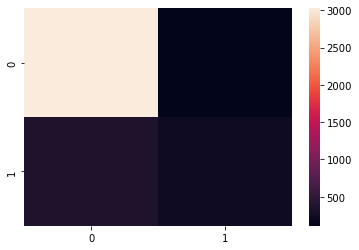

In [33]:
sns.heatmap(confusion_matrix(y_test,preds))